In [67]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [68]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [69]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [70]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[158.75 153.75 150.75]
   [153.75 148.75 145.75]
   [157.   152.   149.  ]
   ...
   [195.25 195.25 197.25]
   [193.75 193.75 195.75]
   [197.75 197.75 199.75]]

  [[169.   164.   161.  ]
   [161.75 156.75 153.75]
   [164.75 159.75 156.75]
   ...
   [195.75 195.75 197.75]
   [195.75 195.75 197.75]
   [199.25 199.25 201.25]]

  [[164.75 159.75 156.75]
   [169.   164.   161.  ]
   [168.5  163.5  160.5 ]
   ...
   [196.25 196.25 198.25]
   [198.75 198.75 200.75]
   [202.5  202.5  204.5 ]]

  ...

  [[145.25 137.25 134.25]
   [145.75 137.75 134.75]
   [148.75 140.75 137.75]
   ...
   [187.75 183.75 184.75]
   [177.25 173.25 174.25]
   [183.5  179.5  180.5 ]]

  [[141.25 133.25 130.25]
   [147.25 139.25 136.25]
   [141.   133.   130.  ]
   ...
   [165.5  161.5  162.5 ]
   [180.75 176.75 177.75]
   [187.5  183.5  184.5 ]]

  [[146.   138.   135.  ]
   [144.75 136.75 133.75]
   [160.   152.   149.  ]
   ...
   [172.75 168.75 169.75]
   [173.5  169.5  170.5 ]
   [184.   180.   18

### To avoid Overshooting

1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron.
3. Add more Convolution layer to extract more feature from images there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [71]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [72]:
model = Sequential()

In [73]:
## Bulding Convolution Layer

In [74]:
model.add(Conv2D(filters=32,kernel_size = 3, padding ='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size = 3,activation='relu'))
model.add((MaxPool2D(pool_size=2,strides=2)))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.add(Conv2D(filters=64,kernel_size = 3, padding ='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size = 3 ,activation='relu'))
model.add((MaxPool2D(pool_size=2,strides=2)))

In [76]:
model.add(Conv2D(filters=128,kernel_size = 3, padding ='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size = 3, activation='relu'))
model.add((MaxPool2D(pool_size=2,strides=2)))

In [77]:
model.add(Conv2D(filters=256,kernel_size = 3, padding ='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size = 3, activation='relu'))
model.add((MaxPool2D(pool_size=2,strides=2)))

In [78]:
model.add(Conv2D(filters=512,kernel_size = 3, padding ='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size = 3, activation='relu'))
model.add((MaxPool2D(pool_size=2,strides=2)))

In [79]:
model.add(Dropout(0.25)) # to avoid overfitting

In [80]:
model.add(Flatten())

In [81]:
model.add(Dense(units=1500,activation='relu'))

In [82]:
model.add(Dropout(0.4))

In [83]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [84]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [86]:
training_history = model.fit(training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
   3/2197 ━━━━━━━━━━━━━━━━━━━━ 2:32 70ms/step - accuracy: 0.0503 - loss: 4.6958

W0000 00:00:1723703148.172658     164 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4087 - loss: 2.1047

W0000 00:00:1723703258.167699     163 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723703258.956401     163 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 54ms/step - accuracy: 0.4088 - loss: 2.1044 - val_accuracy: 0.8475 - val_loss: 0.4723
Epoch 2/10
   2/2197 ━━━━━━━━━━━━━━━━━━━━ 1:51 51ms/step - accuracy: 0.8594 - loss: 0.4797

W0000 00:00:1723703267.063984     165 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.8375 - loss: 0.5108 - val_accuracy: 0.9102 - val_loss: 0.2736
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.9061 - loss: 0.2904 - val_accuracy: 0.9254 - val_loss: 0.2313
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.9366 - loss: 0.1933 - val_accuracy: 0.9457 - val_loss: 0.1650
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.9544 - loss: 0.1406 - val_accuracy: 0.9317 - val_loss: 0.2190
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.9642 - loss: 0.1110 - val_accuracy: 0.9433 - val_loss: 0.1906
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.9721 - loss: 0.0827 - val_accuracy: 0.9398 - val_loss: 0.2283
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 114s 52ms/step - accuracy: 0.9751 - loss: 0.0765 - val_accuracy: 0.9658 - val_loss: 0.1142
Epoch 9/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 113s 52ms/step - accuracy: 0.9801 - lo

# Model Evaluation

In [87]:
#Model Evaluation on Training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9869 - loss: 0.0397


W0000 00:00:1723704325.779649     165 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [88]:
print(train_loss,train_acc)

0.03761925920844078 0.9878796339035034


In [89]:
#Model Evaluation on Validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9609 - loss: 0.1476


In [90]:
print(val_loss, val_acc)

0.134526327252388 0.9623264074325562


# Saving Model

In [96]:
from tensorflow.keras.models import save_model, load_model

save_model(model, '/kaggle/working/steven_model.keras')

In [97]:
#Recording History in json
import json

with open('/kaggle/working/training_hist.json','w') as f:
    json.dump(training_history.history,f)

# Accuracy Visulization

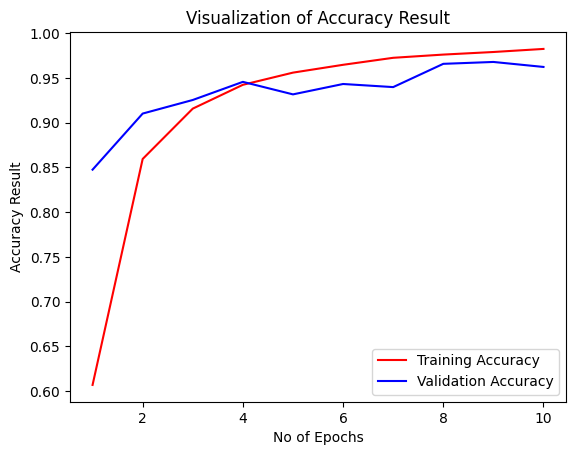

In [104]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend(loc='lower right')
plt.show()

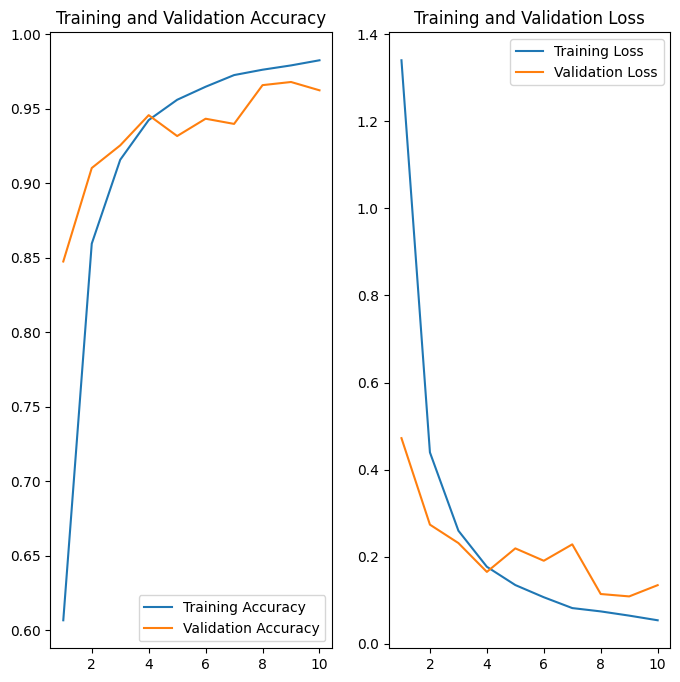

In [98]:
acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs_range = range(1,11)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Some other metrics for model evaluation

In [106]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [108]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=123,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [110]:
y_pred =model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step


(array([[9.9999988e-01, 1.2669331e-07, 8.5030767e-12, ..., 3.8840650e-18,
         8.1876402e-17, 3.3837542e-16],
        [9.9999976e-01, 1.9481621e-07, 4.8146750e-11, ..., 9.6237931e-18,
         9.9714667e-16, 1.9834486e-15],
        [1.0000000e+00, 6.9438927e-11, 2.2872041e-14, ..., 1.9010343e-24,
         3.1793541e-21, 4.5041835e-19],
        ...,
        [1.2644805e-10, 5.8878857e-12, 1.9988641e-07, ..., 5.2626400e-11,
         3.6624492e-10, 9.9999952e-01],
        [4.6809297e-12, 3.7067886e-14, 1.8166836e-09, ..., 3.1499909e-12,
         9.3387147e-12, 1.0000000e+00],
        [1.7501265e-16, 3.3356656e-18, 4.6229305e-15, ..., 3.9585145e-17,
         4.8644746e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [111]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [112]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [114]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [115]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

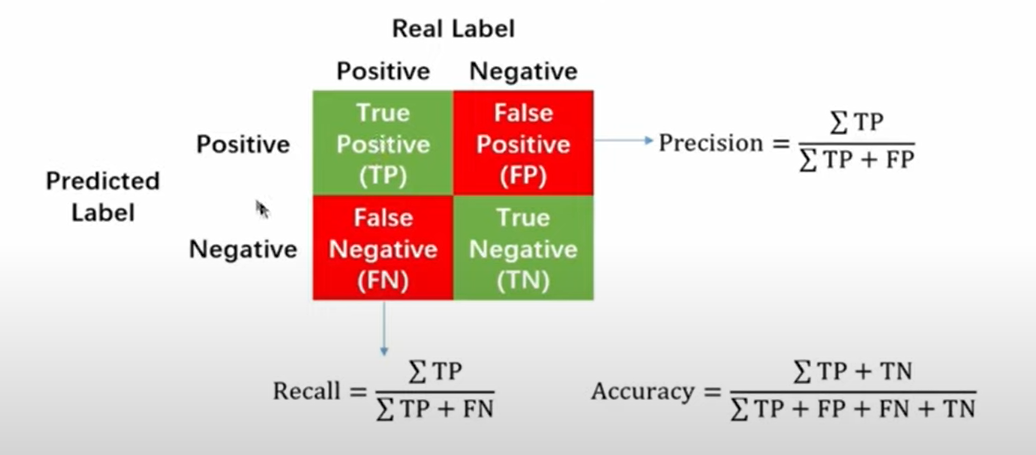

In [119]:
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.98      0.96       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.99      0.97       440
                                   Apple___healthy       0.96      0.96      0.96       502
                               Blueberry___healthy       1.00      0.94      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.94      0.98      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.95      0.94       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

In [122]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

### Confusion Matrix Visualization

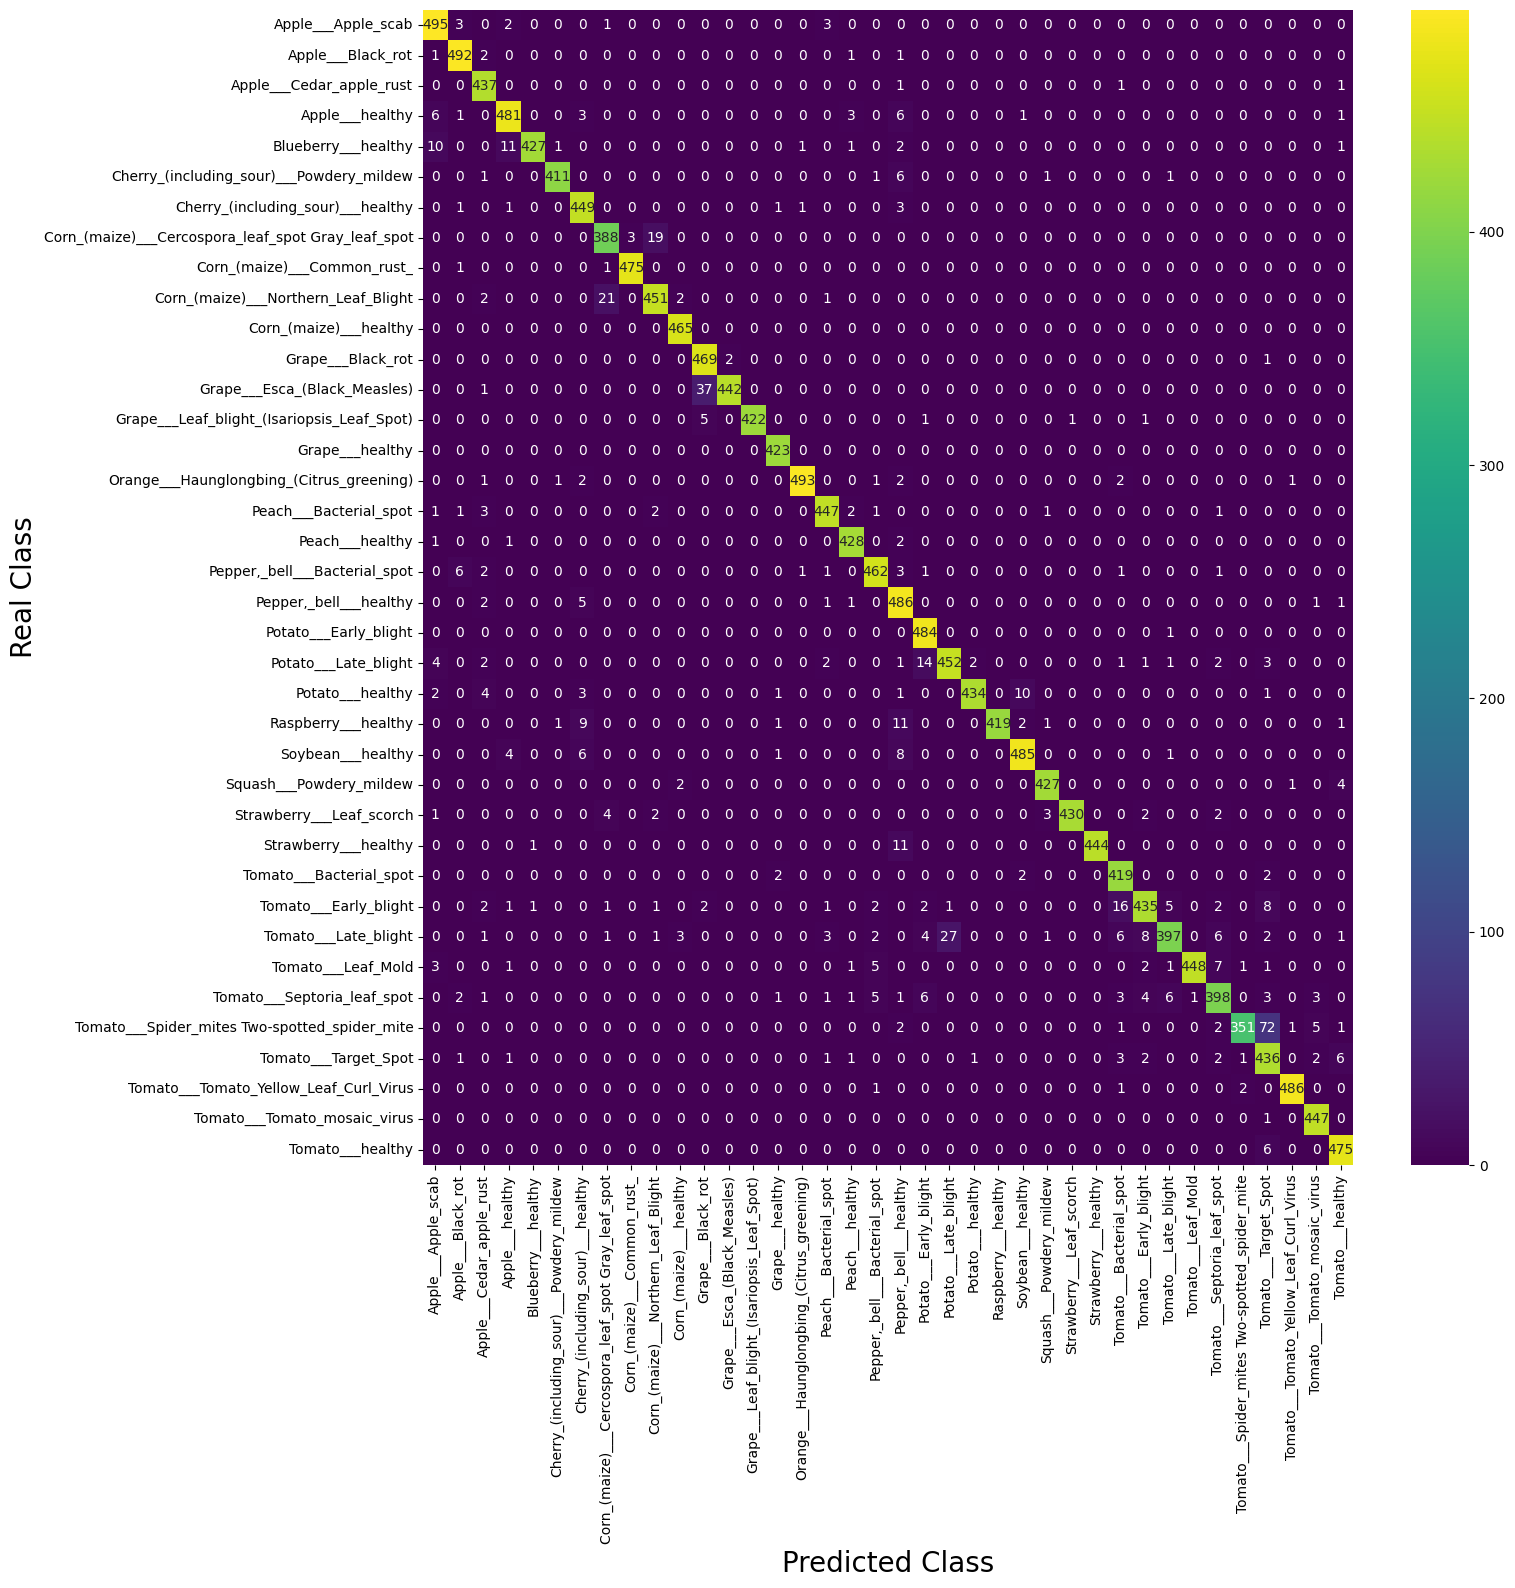

In [132]:
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt='g',
           xticklabels = class_name, yticklabels=class_name, cmap='viridis')
plt.xlabel("Predicted Class",fontsize =20)
plt.ylabel("Real Class", fontsize =20)
plt.show()

# Visualization Single Image of Test set

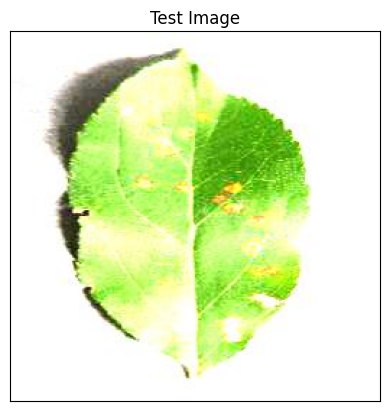

In [144]:
import cv2
image_path = "/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG"
# Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB


#Displaying Image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
83.34617018699646


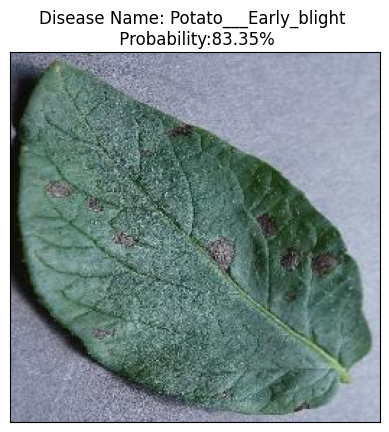

In [173]:
import cv2
image_path = "/kaggle/input/new-plant-diseases-dataset/test/test/PotatoEarlyBlight3.JPG"
# Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch

prediction = model.predict(input_arr)
probability = np.max(prediction)*100
print(probability)

result_index = np.argmax(prediction)
result_index

#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction} \n Probability:{round(probability,2)}%")
plt.xticks([])
plt.yticks([])
plt.show()